# Taller 5

1 ) Implemente el algoritmo de búsqueda en profundidad (DFS) y pruebelo para recorrer el grafo del laberinto de pacman.


In [26]:
import math
import time
import random as rnd
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

In [27]:
def dfs(graph, start):
    visited, stack = set(), [start]
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            stack.extend(graph[vertex] - visited)
    return visited

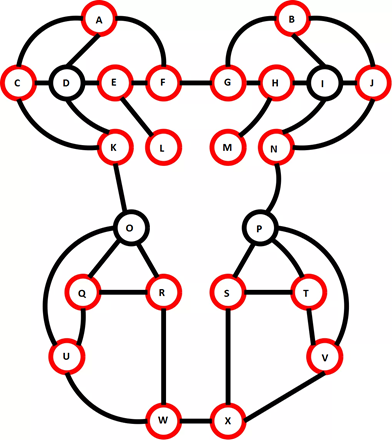

In [30]:
from IPython.display import Image
Image(filename='Pacman_Graph.png')

In [9]:
g ={'A': set(['C', 'D', 'F']),
    'B': set(['G', 'I', 'J']),
    'C': set(['A', 'D', 'K']),
    'D': set(['A', 'C', 'E', 'K']),
    'E': set(['D', 'F', 'L']),
    'F': set(['A', 'E', 'G']),
    'G': set(['B', 'F', 'H']),
    'H': set(['G', 'I', 'M']),
    'I': set(['B', 'H', 'J', 'N']),
    'J': set(['B', 'I', 'N']),
    'K': set(['C', 'D', 'O']),
    'L': set(['E']),
    'M': set(['H']),
    'N': set(['I', 'J', 'P']),
    'O': set(['K', 'Q', 'R', 'U']),
    'P': set(['N', 'S', 'T', 'V']),
    'Q': set(['O', 'R', 'U']),
    'R': set(['O', 'Q', 'W']),
    'S': set(['P', 'T', 'X']),
    'T': set(['P', 'S', 'V']),
    'U': set(['O', 'Q', 'W']),
    'V': set(['P', 'T', 'X']),
    'W': set(['R', 'U', 'X']),
    'X': set(['S', 'V', 'W']),}

print dfs(g, 'A')

set(['A', 'C', 'B', 'E', 'D', 'G', 'F', 'I', 'H', 'K', 'J', 'M', 'L', 'O', 'N', 'Q', 'P', 'S', 'R', 'U', 'T', 'W', 'V', 'X'])


2 ) Realice el análisis del tiempo de ejecución del algoritmo DFS, justifiquelo.

In [10]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps

In [11]:
def randomGraph(n):
    if n>26:
        n = 26
    if n<1:
        n=1
    for x in range(1,n+1):
        l1 = [chr(n) for n in rnd.sample(range(65, 65+x), x)]
        l2 = []
    for y in range(x):
        l2.append(set(rnd.sample(l1, rnd.randint(1,len(l1)))))
    g = dict(zip( l1, l2))

    return g

In [12]:
def acct_dfs(graph, start, acct):
    visited, stack = set(), [start]; acct.count(); acct.count()
    while stack:
        acct.count()
        vertex = stack.pop(); acct.count()
        if vertex not in visited:
            acct.count()
            visited.add(vertex); acct.count()
            stack.extend(graph[vertex] - visited); acct.count()
    return visited

In [13]:
import random as rnd

def exper_dfs(n):
    steps = []
    timeP = []
    t_n = []
    acct = Counter()
    for i in range(1,n+1):
        graph = randomGraph(i)
        start = chr(rnd.randint(65,64+len(graph)))
        acct.reset()
        tic = time.clock()
        acct_dfs(graph, start, acct)
        toc = time.clock()
        timeP.append(toc - tic)
        steps.append(acct.steps)
    results = [steps, timeP]
    
    return results

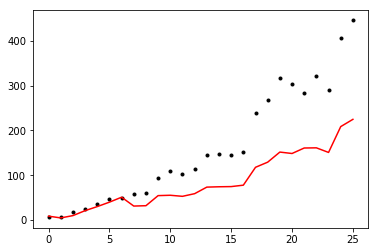

In [25]:
pl.clf()
x = np.arange(26)
res = exper_dfs(26)
p = np.array(res[0])            #-> Arreglo con la cantidad de procesos realizados para cada arreglo (Negro)
t = np.array(res[1]) * 1e6      #-> Arreglo de tiempos de ejecucion en el ordenamiento de cada arreglo (Rojo)

pl.plot(x, p, 'k.', t, 'r')

El algoritmo de DFS recorre todo el grafo pasando por cada uno de sus nodos de forma ordenada, esto lo hace por medio de una recursion que expande cada nodo, es un algoritmo basado en backtracking de forma similar a la que se hace en el problema del laberinto, en el que primero se va desplazando por los caminos no visitados y va marcando los sitios ya visitados con el fin de no repetir dichos desplazamientos, hasta encontrar la salida y empieza a devolverse, en el caso del grafo, cuando no quedan mas nodos por visitar regresa, repitiendo el proceso con los nodos adyacentes al nodo visitado.

La complejidad de este algoritmo es de $O(V+E)$, en donde $V$ es la cantidad de vertices y $E$ la cantidad de aristas, debido a que debe hacer el recorrido total del grafo.

3 ) Diseñe e implemente un algoritmo que identifique ciclos en un grafo.

In [9]:
def dfs_Cycles(graph, start):
    end = start
    stack = [(start, [])]
    while stack:
        state, path = stack.pop()
        if path and state == end:
            yield path
            continue
        for next_state in graph[state]:
            if next_state in path:
                continue
            stack.append((next_state, path+[next_state]))

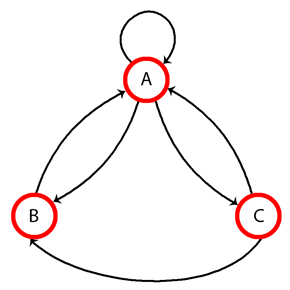

In [10]:
from IPython.display import Image
Image(filename='Cycle_Graph.png')

In [11]:
g ={'A': set(['A', 'B', 'C']),
    'B': set(['A']),
    'C': set(['A', 'B'])}

cycles = [[node]+path  for node in g for path in dfs_Cycles(g, node)]

print cycles

[['A', 'B', 'A'], ['A', 'C', 'B', 'A'], ['A', 'C', 'A'], ['A', 'A'], ['C', 'B', 'A', 'C'], ['C', 'A', 'C'], ['B', 'A', 'B'], ['B', 'A', 'C', 'B']]


4 ) Diseñe e implemente un algoritmo que verifique si un grafo es bipartito o no.

*Un grafo es bipartito si y solo si sus ciclos tienen un numero par de vertices

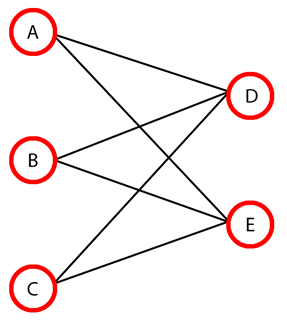

In [12]:
from IPython.display import Image
Image(filename='Bipartite_Graph.png')

In [13]:
def isBipartite(graph):
    if len(graph)<2:
        return "No es bipartito"
    for node in graph:
        l=[]
        for path in dfs_Cycles(graph, node):
            l = [node]+path
            if ((len(l)-1)%2) != 0:
                return "No es bipartito"
    return "Es bipartito"

In [14]:
g ={'A': set(['D','E']),
    'B': set(['D','E']),
    'C': set(['D','E']),
    'D': set(['A','B','C']),
    'E': set(['A','B','C'])}

print isBipartite(g)

Es bipartito


5 ) Modifique el algoritmo de dijkstra para solucionar el problema de la ruta más corta en un grafo sin pesos, i.e. partiendo de un vertice inicial encontrar la ruta y su distancia a todos los demás vertices haciendo la menor cantidad de saltos (vertices en la ruta)

In [34]:
from heapq import heappush, heappop

def updateheap(heap,d,v):
    for i in range(len(heap)):
        if heap[i][1] == v:
            heap[i][0] = d
            fix_minheap(heap,i) # heap=heapify(heap) ineficient      
            break    

def fix_minheap(heap, i):
    if i == 0: return  
    p = int(i/2) #parent  
    if p >= 0 and heap[p][0] > heap[i][0]:
        heap[i], heap[p] = heap[p], heap[i]
        fix_minheap(heap,p)   
            
def Dijkstra(G,start):
        
    D = {} # dictionary of final distances
    for v in G:
        D[v] = float('inf')
    D[start] = 0
    
    P = {} # dictionary of predecessors
    
    Q=[] #  priority queue est.dist. of non-final vert.
    for v in G:
        item = []
        item.append(D[v])
        item.append(v)
        heappush(Q,item)
    
    
    #S = []
    while Q:
        u = heappop(Q)[1]
        #S.append(u)
        for v in G[u]:
            newDuv = D[u] + 1
            if newDuv < D[v]:
                P[v] = u
                D[v] = newDuv
                updateheap(Q,D[v],v)
    return D,P

In [46]:
g = {'S': {'U', 'X'},
    'U': {'V', 'X'},
    'V': {'Y'},
    'X':{'U','V','Y'},
    'Y':{'S','V'}}

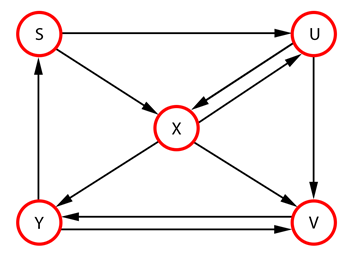

In [47]:
from IPython.display import Image
Image(filename='Dijkstra_Graph.png')

In [54]:
start = 'S'
D = Dijkstra(g, start)
print "Saltos para cada par de Nodos desde el nodo", start, ":", D[0]
print "Ruta para cada par de Nodos desde el nodo", start, ":", D[1]

Saltos para cada par de Nodos desde el nodo S : {'Y': 2, 'X': 1, 'S': 0, 'U': 1, 'V': 2}
Ruta para cada par de Nodos desde el nodo S : {'Y': 'X', 'X': 'S', 'U': 'S', 'V': 'X'}
